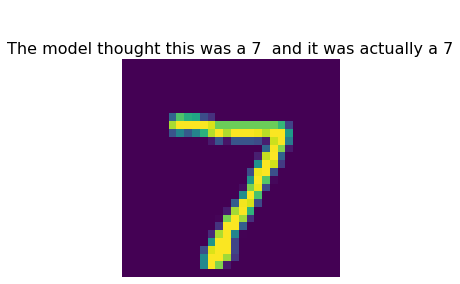

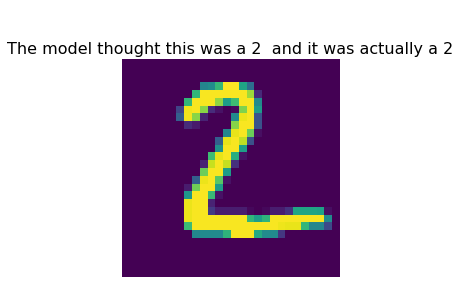

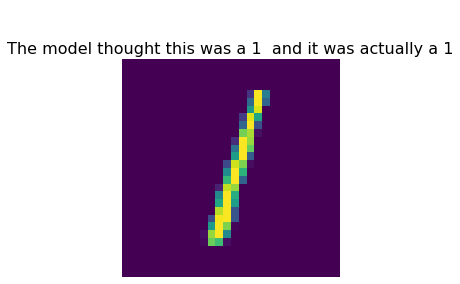

In [1]:
# Import the necessary modules
import requests
import numpy as np
import json
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

no_test = 3

def show(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})
    
    
# Loading data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Data preprocessing (here, normalization)
x_train, x_test = x_train / 255.0, x_test / 255.0
# Format the image data so as to be sent as JSON

payload = json.dumps( { 'instances': x_test[:no_test].tolist() } )
headers = {"content-type": "application/json"} 
# URL of the TensorFlow Serving container's API
url = 'http://10.192.1.103:8501/v1/models/demo-mnist:predict'

# Send the request
response = requests.post(url, data=payload, headers=headers)
predictions = json.loads(response.text)['predictions']

for i in range(0,no_test):
  show(i, 'The model thought this was a {}  and it was actually a {}'.format(
    np.argmax(predictions[i]), y_test[i]))
